In [126]:
import pandas as pd
import numpy as np
import seaborn as sns

In [127]:
df = sns.load_dataset('titanic')

In [128]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [129]:
df = df.dropna()

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     182 non-null    int64   
 1   pclass       182 non-null    int64   
 2   sex          182 non-null    object  
 3   age          182 non-null    float64 
 4   sibsp        182 non-null    int64   
 5   parch        182 non-null    int64   
 6   fare         182 non-null    float64 
 7   embarked     182 non-null    object  
 8   class        182 non-null    category
 9   who          182 non-null    object  
 10  adult_male   182 non-null    bool    
 11  deck         182 non-null    category
 12  embark_town  182 non-null    object  
 13  alive        182 non-null    object  
 14  alone        182 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 18.2+ KB


In [132]:
le = LabelEncoder()

In [133]:
for i in df.columns:
    if df[i].dtype == 'object' or df[i].dtype == 'category':
        df[i] = le.fit_transform(df[i])

In [134]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,2,0,1,False
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,2,1,False
6,0,1,1,54.0,0,0,51.8625,2,0,1,True,4,2,0,True
10,1,3,0,4.0,1,1,16.7000,2,2,0,False,6,2,1,False
11,1,1,0,58.0,0,0,26.5500,2,0,2,False,2,2,1,True


In [135]:
df.drop('deck',axis=1,inplace=True)

In [136]:
scaler = StandardScaler()

In [137]:
X = df.drop(columns=['survived'])
y = df['survived']

In [138]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [139]:
from sklearn.neighbors import KNeighborsClassifier

In [140]:
clf = KNeighborsClassifier(n_neighbors=26)

In [141]:
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=26)

In [142]:
y_pred = clf.predict(X_test)

In [143]:
from sklearn.metrics import accuracy_score

In [144]:
print("The Accuracy is:", accuracy_score(y_test,y_pred))

The Accuracy is: 0.7567567567567568


In [145]:
score = []
for i in range(1,50):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [146]:
import matplotlib.pyplot as plt

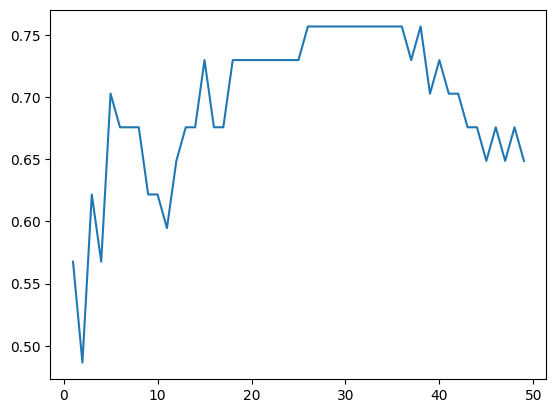

In [147]:
plt.plot(range(1, 50), score)